In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 5):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion 

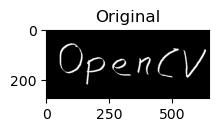

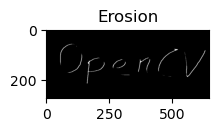

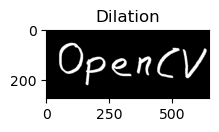

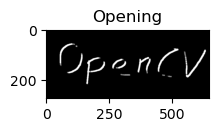

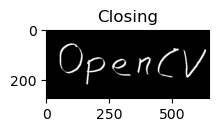

In [6]:
import cv2
import numpy as np

image = cv2.imread('images/opencv_inv.png', 0)
imshow('Original', image)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion)

# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

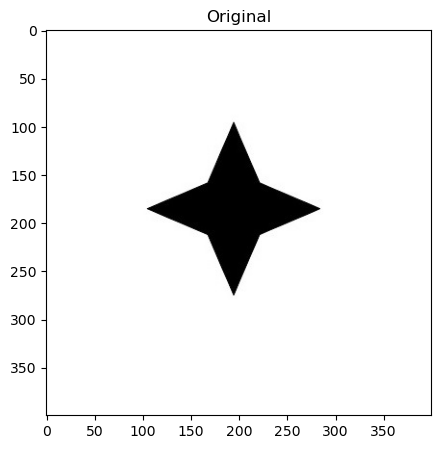

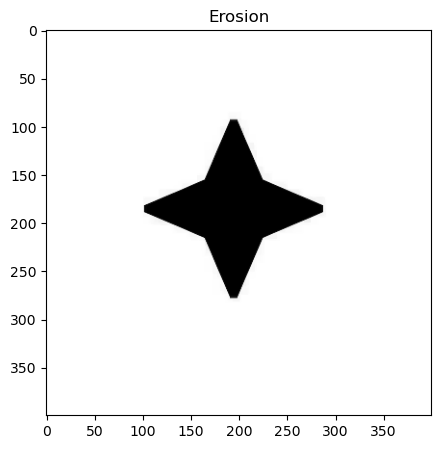

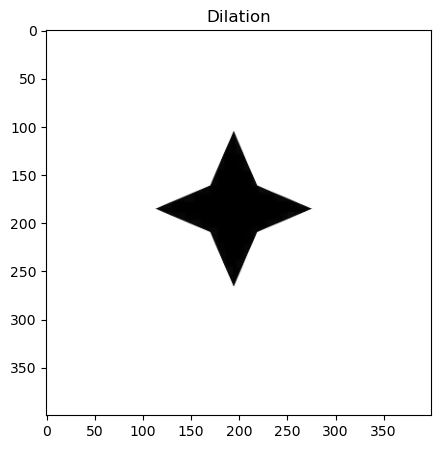

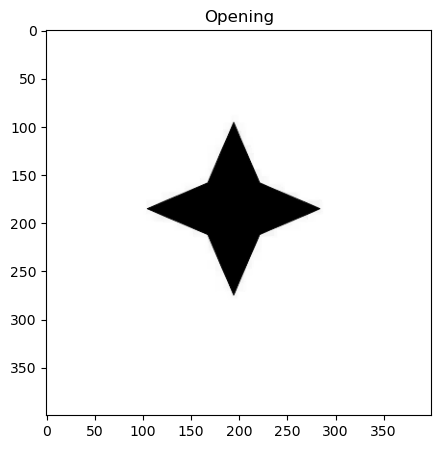

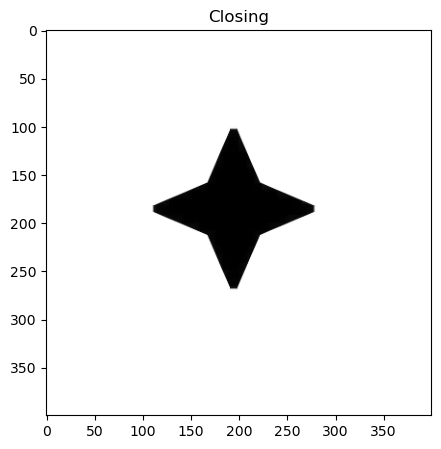

In [5]:
import cv2
import numpy as np

image = cv2.imread('images/4star.jpg', 0)
imshow('Original', image)

# Let's define our kernel size
kernel = np.ones((7,7), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion)

# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

## canny edge detection


- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively. 
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. 

Edge detection needs a threshold to tell what difference/change should be counted as edge

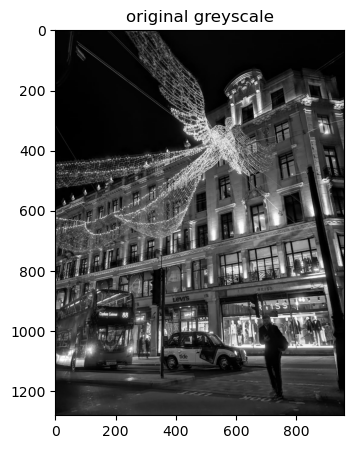

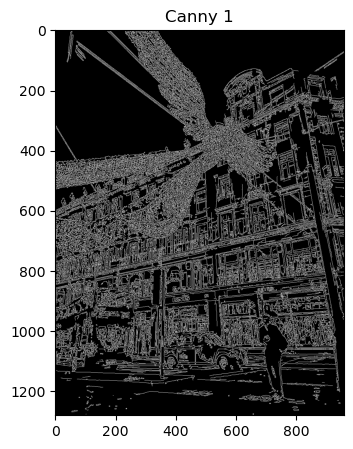

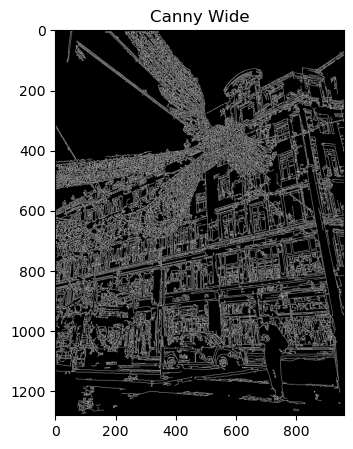

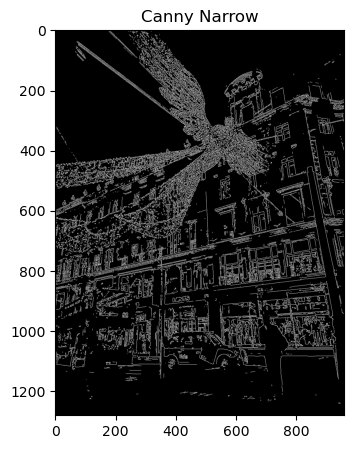

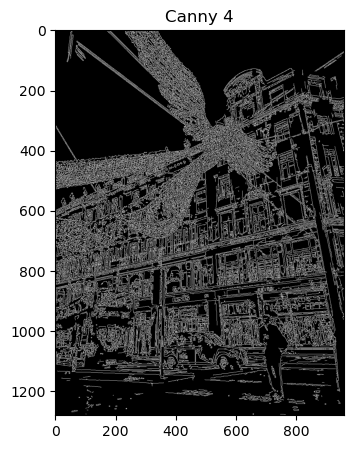

In [10]:
image = cv2.imread('images/londonxmas.jpeg',0)


imshow('original greyscale', image)

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)

# Wide edge thresholds expect lots of edges
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny)

# Narrow threshold, expect less edges 
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)

canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny)

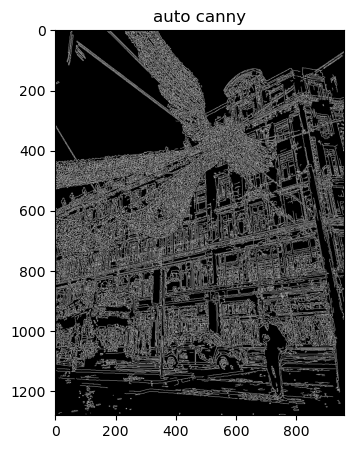

In [12]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5)) # first blurred for the resaons mentioned in notebook nine
  med_val = np.median(image) 
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)